In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving first_500000_rows.csv to first_500000_rows.csv


In [3]:
df = pd.read_csv('/content/first_500000_rows.csv')

In [4]:
column_data = df['dealer_final_value']

print(column_data)


0         24
1         18
2         22
3         18
4         20
          ..
499995    17
499996    19
499997    18
499998    22
499999    20
Name: dealer_final_value, Length: 500000, dtype: object


In [5]:
# Remove any leading/trailing whitespace
column_data = column_data.str.strip()

# Replace any non-numeric characters with empty string
column_data = column_data.str.replace('[^0-9]', '', regex=True)

# Convert to numeric (will result in NaN for values that cannot be converted)
column_data = pd.to_numeric(column_data, errors='coerce')

# Optionally, you can fill NaN values with a specific value (e.g., 0)
# column_data = column_data.fillna(0)

print(column_data)

0         24.0
1         18.0
2         22.0
3         18.0
4         20.0
          ... 
499995    17.0
499996    19.0
499997    18.0
499998    22.0
499999    20.0
Name: dealer_final_value, Length: 500000, dtype: float64


In [6]:
column_data_2 = df['player_final_value']

print(column_data_2)

0         ['BJ']
1           [21]
2           [13]
3           [18]
4           [26]
           ...  
499995      [17]
499996      [14]
499997      [17]
499998      [12]
499999      [20]
Name: player_final_value, Length: 500000, dtype: object


In [7]:
column_data_2 = column_data_2.str.strip()

column_data_2 = column_data_2.str.replace('[^0-9]', '', regex=True)

column_data_2 = pd.to_numeric(column_data_2, errors='coerce')


print(column_data_2)

0          NaN
1         21.0
2         13.0
3         18.0
4         26.0
          ... 
499995    17.0
499996    14.0
499997    17.0
499998    12.0
499999    20.0
Name: player_final_value, Length: 500000, dtype: float64


In [8]:
# Explore column_data
print(column_data.describe())  # Summary statistics
print(column_data.isnull().sum())  # Count of missing values
print(column_data.value_counts())  # Frequency of unique values

# Explore column_data_2
print(column_data_2.describe())  # Summary statistics
print(column_data_2.isnull().sum())  # Count of missing values
print(column_data_2.value_counts())  # Frequency of unique values

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
dealer_final_value
20.0    90743
18.0    70539
19.0    68263
17.0    66475
21.0    37607
22.0    36761
23.0    32760
24.0    28748
25.0    24386
26.0    20242
Name: count, dtype: int64
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897
player_final_value
20.0        78186
17.0        54348
19.0        54072
18.0        51040
15.0        34856
            ...  
181320.0        1
171215.0        1
2415.0          1
192012.0        1
211916.0        1
Name: count, Length: 1151, dtype: int64


In [9]:
# Remove rows with missing values in both columns
df_cleaned = df.dropna(subset=['dealer_final_value', 'player_final_value'])

# Explore the cleaned data
print(column_data.describe())
print(column_data.isnull().sum())
print(column_data_2.describe())
print(column_data_2.isnull().sum())

count    476524.000000
mean         20.333702
std           2.580619
min          17.000000
25%          18.000000
50%          20.000000
75%          22.000000
max          26.000000
Name: dealer_final_value, dtype: float64
23476
count    4.761030e+05
mean     8.535148e+03
std      3.803095e+05
min      4.000000e+00
25%      1.600000e+01
50%      1.800000e+01
75%      2.000000e+01
max      2.625252e+07
Name: player_final_value, dtype: float64
23897


In [10]:
df_cleaned

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
0,0,416,10,"[10, 11]","[10, 4, 10]",24,"[[10, 11]]",['BJ'],[['S']],1,0,1.5
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,8228,307,10,"[10, 7]","[10, 7]",17,"[[10, 7]]",[17],[['S']],-8,-1,0.0
499996,8228,303,3,"[9, 3]","[3, 6, 10]",19,"[[9, 3, 2]]",[14],"[['H', 'S']]",-10,-1,-1.0
499997,8228,297,5,"[6, 11]","[5, 2, 11]",18,"[[6, 11, 10]]",[17],[['D']],-7,-1,-2.0
499998,8228,291,5,"[9, 3]","[5, 10, 7]",22,"[[9, 3]]",[12],[['S']],-7,-1,1.0


In [11]:
# Remove duplicate rows based on all columns
df_no_duplicates = df_cleaned.drop_duplicates()

# Explore the data after removing duplicates
print(df_no_duplicates.shape)  # Check the new shape


(500000, 12)


In [12]:
# Calculate the IQR for both columns
Q1_dealer = column_data.quantile(0.25)
Q3_dealer = column_data.quantile(0.75)
IQR_dealer = Q3_dealer - Q1_dealer

Q1_player = column_data_2.quantile(0.25)
Q3_player = column_data_2.quantile(0.75)
IQR_player = Q3_player - Q1_player

# Define bounds for outliers
lower_bound_dealer = Q1_dealer - 1.5 * IQR_dealer
upper_bound_dealer = Q3_dealer + 1.5 * IQR_dealer

lower_bound_player = Q1_player - 1.5 * IQR_player
upper_bound_player = Q3_player + 1.5 * IQR_player

# Identify outliers
outliers_dealer = df_no_duplicates[(column_data > upper_bound_dealer) | (column_data < lower_bound_dealer)]
outliers_player = df_no_duplicates[(column_data_2 > upper_bound_player) | (column_data_2 < lower_bound_player)]

# Remove them:
df_no_outliers = df_no_duplicates[
    (column_data <= upper_bound_dealer) & (column_data >= lower_bound_dealer) &
    (column_data_2 <= upper_bound_player) & (column_data_2 >= lower_bound_player)]

# Explore the data after outlier handling
print(df_no_outliers.shape)

(441377, 12)


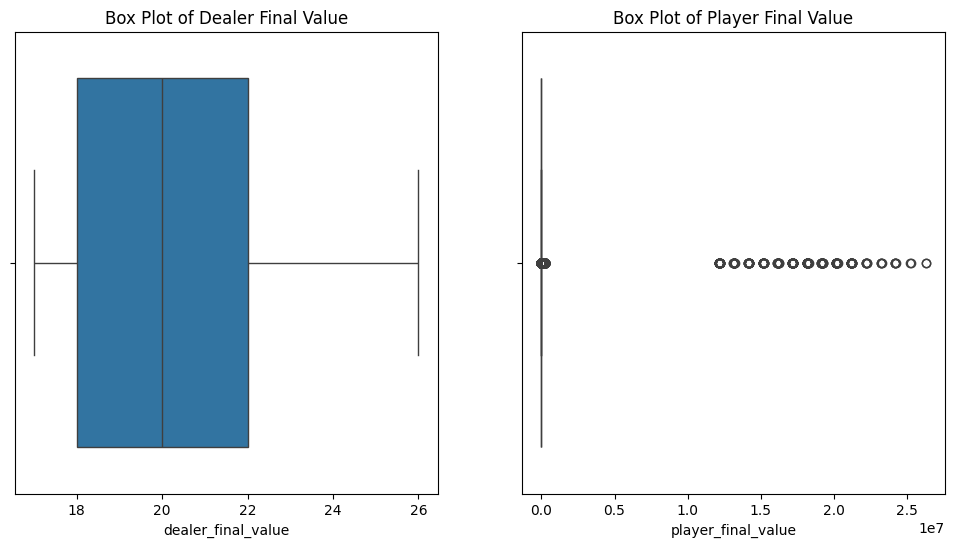

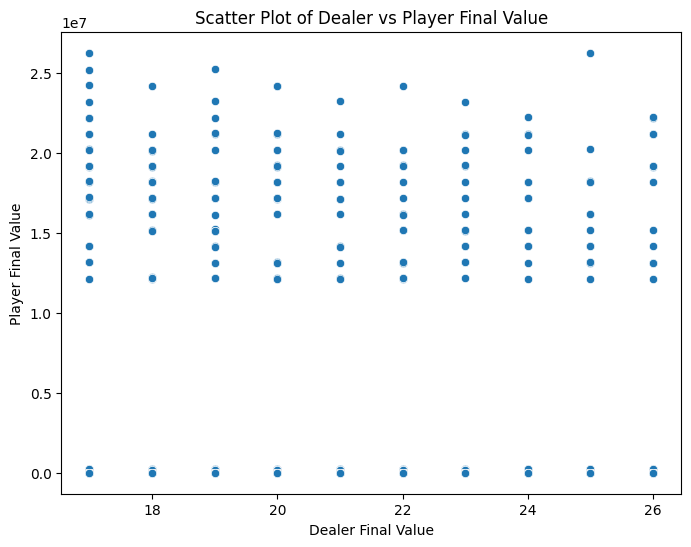

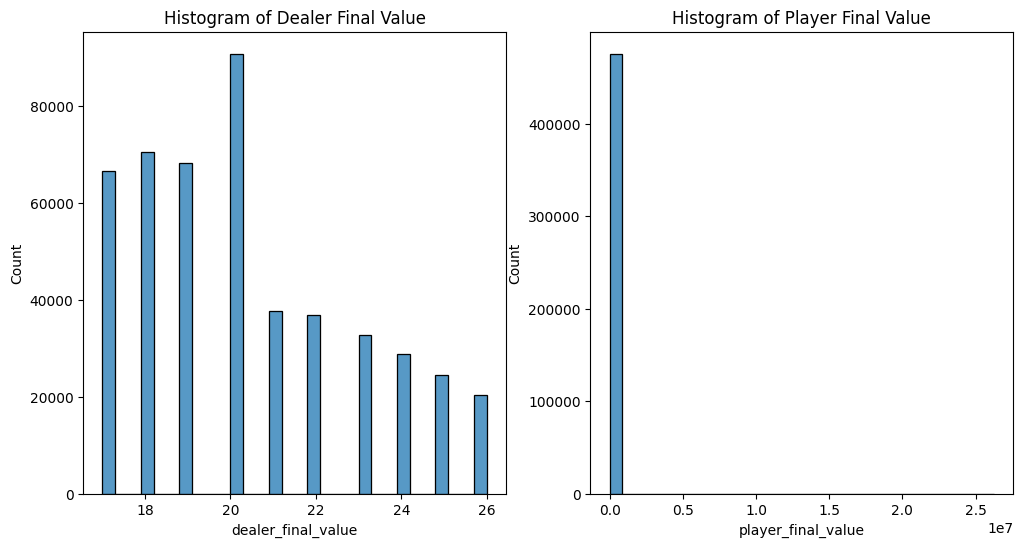

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=column_data)
plt.title('Box Plot of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=column_data_2)
plt.title('Box Plot of Player Final Value')
plt.show()

# Scatter plot to see the relationship between the two columns and identify outliers visually
plt.figure(figsize=(8, 6))
sns.scatterplot(x=column_data, y=column_data_2)
plt.title('Scatter Plot of Dealer vs Player Final Value')
plt.xlabel('Dealer Final Value')
plt.ylabel('Player Final Value')
plt.show()

# Histogram for each column to see the distribution and potential outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(column_data, bins=30)
plt.title('Histogram of Dealer Final Value')

plt.subplot(1, 2, 2)
sns.histplot(column_data_2, bins=30)
plt.title('Histogram of Player Final Value')
plt.show()


In [14]:
df_no_outliers

,shoe_id,cards_remaining,dealer_up,initial_hand,dealer_final,dealer_final_value,player_final,player_final_value,actions_taken,run_count,true_count,win
1,0,411,10,"[5, 5]","[10, 8]",18,"[[5, 5, 11]]",[21],"[['H', 'S']]",-2,0,1.0
2,0,406,6,"[3, 10]","[6, 6, 10]",22,"[[3, 10]]",[13],[['S']],-2,0,1.0
3,0,401,10,"[5, 9]","[10, 8]",18,"[[5, 9, 11, 3]]",[18],"[['H', 'H', 'S']]",-1,0,0.0
4,0,395,8,"[6, 10]","[8, 2, 10]",20,"[[6, 10, 10]]",[26],[['H']],-1,0,-1.0
5,0,389,7,"[3, 4]","[7, 2, 10]",19,"[[3, 4, 11]]",[18],"[['H', 'S']]",-2,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,8228,307,10,"[10, 7]","[10, 7]",17,"[[10, 7]]",[17],[['S']],-8,-1,0.0
499996,8228,303,3,"[9, 3]","[3, 6, 10]",19,"[[9, 3, 2]]",[14],"[['H', 'S']]",-10,-1,-1.0
499997,8228,297,5,"[6, 11]","[5, 2, 11]",18,"[[6, 11, 10]]",[17],[['D']],-7,-1,-2.0
499998,8228,291,5,"[9, 3]","[5, 10, 7]",22,"[[9, 3]]",[12],[['S']],-7,-1,1.0


In [15]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441377 entries, 1 to 499999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shoe_id             441377 non-null  int64  
 1   cards_remaining     441377 non-null  int64  
 2   dealer_up           441377 non-null  int64  
 3   initial_hand        441377 non-null  object 
 4   dealer_final        441377 non-null  object 
 5   dealer_final_value  441377 non-null  object 
 6   player_final        441377 non-null  object 
 7   player_final_value  441377 non-null  object 
 8   actions_taken       441377 non-null  object 
 9   run_count           441377 non-null  int64  
 10  true_count          441377 non-null  int64  
 11  win                 441377 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 43.8+ MB


In [16]:
df_no_outliers.select_dtypes(include=['number']).columns #the columns to work with in the machine learning process

Index(['shoe_id', 'cards_remaining', 'dealer_up', 'run_count', 'true_count',
       'win'],
      dtype='object')

In [17]:
df_no_outliers.select_dtypes(include=['object']).columns  #if you like you can do additional feature engineering with these columns

Index(['initial_hand', 'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Scale standardization
# Select numerical features to scale (excluding dummy variables)
scaler = StandardScaler()

# Split data into training and testing subsets
# Define features (X) and target variable (y)
X = df_no_outliers.drop(['initial_hand', 'dealer_final', 'dealer_final_value', 'player_final',
       'player_final_value', 'actions_taken'], axis=1)
X = X.drop(['shoe_id'], axis=1)
X_scaled = scaler.fit_transform(X)

y = df_no_outliers['player_final_value']

# Split the data (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shapes after splitting:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes after splitting:
X_train: (353101, 5)
X_test: (88276, 5)
y_train: (353101,)
y_test: (88276,)


In [19]:
y_train

,player_final_value
79727,[21]
153287,[23]
61619,[11]
337701,[21]
455709,[12]
...,...
293699,[20]
414468,[20]
149499,[20]
166434,[22]


In [20]:
X

,cards_remaining,dealer_up,run_count,true_count,win
1,411,10,-2,0,1.0
2,406,6,-2,0,1.0
3,401,10,-1,0,0.0
4,395,8,-1,0,-1.0
5,389,7,-2,0,-1.0
...,...,...,...,...,...
499995,307,10,-8,-1,0.0
499996,303,3,-10,-1,-1.0
499997,297,5,-7,-1,-2.0
499998,291,5,-7,-1,1.0


In [21]:
pd.DataFrame(X_scaled)

,0,1,2,3,4
0,1.650821,0.972773,-0.268889,-0.012324,0.952965
1,1.599942,-0.408381,-0.268889,-0.012324,0.952965
2,1.549062,0.972773,-0.142369,-0.012324,0.033783
3,1.488007,0.282196,-0.142369,-0.012324,-0.885400
4,1.426952,-0.063092,-0.268889,-0.012324,-0.885400
...,...,...,...,...,...
441372,0.592530,0.972773,-1.028012,-0.503836,0.033783
441373,0.551826,-1.444246,-1.281053,-0.503836,-0.885400
441374,0.490771,-0.753669,-0.901492,-0.503836,-1.804582
441375,0.429716,-0.753669,-0.901492,-0.503836,0.952965


In [22]:
pd.DataFrame(X_train)

,0,1,2,3,4
0,-1.259480,0.972773,1.375876,1.953723,0.952965
1,-0.842269,0.972773,1.628917,1.953723,-0.885400
2,-0.557344,-0.753669,0.490233,0.479188,1.872148
3,0.134615,0.972773,-2.040175,-1.486860,1.872148
4,-0.598048,-1.098958,1.122835,0.970700,-0.885400
...,...,...,...,...,...
353096,0.785872,-1.098958,1.249356,0.479188,1.872148
353097,1.009741,-1.444246,0.869794,0.479188,0.952965
353098,1.325193,0.972773,1.502397,0.479188,0.952965
353099,-0.455585,1.318062,1.628917,1.462211,-0.885400


In [23]:
pd.DataFrame(X_test)

,0,1,2,3,4
0,-0.709982,-0.753669,-0.015849,-0.012324,0.952965
1,-0.018023,-0.063092,-0.648451,-0.503836,-0.885400
2,1.172555,0.282196,0.616754,-0.012324,0.952965
3,1.701700,-1.789535,-0.268889,-0.012324,0.952965
4,-1.198424,1.318062,1.502397,1.953723,0.952965
...,...,...,...,...,...
88271,-0.119781,-0.063092,0.363713,-0.012324,-0.885400
88272,-0.496289,0.627485,0.869794,0.479188,0.952965
88273,-0.679455,-0.408381,-0.142369,-0.012324,0.952965
88274,0.623058,1.318062,-0.521930,-0.012324,-0.425808


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [25]:
# Convert X_test to a pandas DataFrame
X_test_df = pd.DataFrame(X_test)

# Now you can use replace on the DataFrame
X_test_str = X_test_df.astype(str).replace(r'\[|\]', '', regex=True)

# Convert y_test to a pandas Series if it's not already
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

y_test_str = y_test.astype(str).replace(r'\[|\]', '', regex=True)

In [26]:
y_train = y_train.str.strip()  # Remove leading/trailing spaces if any

# Extract numeric values within square brackets
y_train = y_train.str.extract(r'\[(\d+)\]', expand=False)

# Convert to numeric (resulting in NaN for non-convertible values)
y_train = pd.to_numeric(y_train, errors='coerce')

# Optionally, fill NaN values with a specific value (e.g., 0)
# y_train = y_train.fillna(0)

# Repeat this process for y_test if it also has similar string values:
y_test = y_test.str.strip()
y_test = y_test.str.extract(r'\[(\d+)\]', expand=False)
y_test = pd.to_numeric(y_test, errors='coerce')
# y_test = y_test.fillna(0)

In [27]:
# Define the parameter grid for Grid Search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best score (negative MSE): -8.592813017987051


In [28]:
# Define the parameter grid for Grid Search
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor()

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_reg, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object on training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score (negative MSE) for Decision Tree: {grid_search_dt.best_score_}")

# Get the best Decision Tree model from GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the best model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R-squared: {r2_dt}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best parameters for Decision Tree: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}
Best score (negative MSE) for Decision Tree: -5.35855017606643
Decision Tree Mean Squared Error: 5.387418931006588
Decision Tree R-squared: 0.46733160956302633


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for Randomized Search
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1]
}


# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor()

# Initialize RandomizedSearchCV for Random Forest
# n_iter controls the number of random combinations to try
random_search_rf = RandomizedSearchCV(rf_reg, param_distributions=param_dist_rf,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   random_state=42) # Add random_state for reproducibility

# Fit the RandomizedSearchCV object on training data
random_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best score (negative MSE) for Random Forest: {random_search_rf.best_score_}")

# Get the best model from RandomizedSearchCV
best_rf_model = random_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Best parameters for Random Forest: {'random_state': 42, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Best score (negative MSE) for Random Forest: -5.37282833400743
Random Forest Mean Squared Error: 5.401711237531769
Random Forest R-squared: 0.4659184913314769


I feel the Random Forest Regression model is the best model to use based onn the models currently predicted. I feel the runner up would be the Linear Regression model.